In [2]:
import omnipath as op
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pySankey import sankey as sn
import mellon as ml
import networkx as nx
from matplotlib.pyplot import figure
import netrd
import itertools

c:\Users\melis\AppData\Local\Programs\Python\Python37\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
db = op.interactions.import_intercell_network(transmitter_params = {"categories":"ligand"}, receiver_params = {"categories": "receptor"})
db = db[np.logical_not(db['genesymbol_intercell_source'].str.startswith('HLA'))]
db = db[np.logical_not(db['genesymbol_intercell_target'].str.startswith('HLA'))]
db = db[~db['genesymbol_intercell_target'].astype(str).str.startswith('COMPLEX')]
db = db[~db['genesymbol_intercell_source'].astype(str).str.startswith('COMPLEX')]

In [4]:
def make_disease_network(unique_genes, tgts, dis1, dis2):

    source, percSrc, targets, percTgt, sum = ml.lr.find_hits(tgts[tgts[dis1]>0], db)
    LRs = db[['genesymbol_intercell_source','genesymbol_intercell_target']][(db['genesymbol_intercell_source'].isin(list(sum.gene))) | (db['genesymbol_intercell_target'].isin(list(sum.gene)))]

    # Adjacency matrix with entire network across all diseases
    adj_LRs = pd.DataFrame(np.zeros(shape=(len(unique_genes), len(unique_genes))), index = unique_genes, columns = unique_genes)

    for n in range (0, np.shape(LRs)[0]):
        adj_LRs.iloc[adj_LRs.index.get_loc(LRs.iloc[n]['genesymbol_intercell_source']), adj_LRs.columns.get_loc(LRs.iloc[n]['genesymbol_intercell_target'])] += 1

    #Number of cell-cell interactions ligands of interest are involved in
    print(adj_LRs.sum(axis = 0).sort_values(ascending=False)[adj_LRs.sum(axis = 0).sort_values(ascending=False).index.isin(list(tgts.index))])

    #Number of cell-cell interactions receptors of interest are involved in
    adj_LRs.sum(axis = 1).sort_values(ascending=False)[adj_LRs.sum(axis = 1).sort_values(ascending=False).index.isin(list(tgts.index))]

    # Overview of LR network and calculating rank of importance with PageRank

    G1 = nx.from_pandas_adjacency(adj_LRs)


    #plt.figure(figsize=(30,30), dpi = 300)

    #sm = nx.draw_networkx(G1, with_labels=False, node_size = 50)

    #plt.title('plots/SCZ LR network colored by PageRank score')
    #plt.show()


    source, percSrc, targets, percTgt, sum = ml.lr.find_hits(tgts[tgts[dis2]>0], db)
    LRs = db[['genesymbol_intercell_source','genesymbol_intercell_target']][(db['genesymbol_intercell_source'].isin(list(sum.gene))) | (db['genesymbol_intercell_target'].isin(list(sum.gene)))]

    # Adjacency matrix with entire network across all diseases
    adj_LRs = pd.DataFrame(np.zeros(shape=(len(unique_genes), len(unique_genes))), index = unique_genes, columns = unique_genes)

    for n in range (0, np.shape(LRs)[0]):
        adj_LRs.iloc[adj_LRs.index.get_loc(LRs.iloc[n]['genesymbol_intercell_source']), adj_LRs.columns.get_loc(LRs.iloc[n]['genesymbol_intercell_target'])] += 1

    #Number of cell-cell interactions ligands of interest are involved in
    print(adj_LRs.sum(axis = 0).sort_values(ascending=False)[adj_LRs.sum(axis = 0).sort_values(ascending=False).index.isin(list(tgts.index))])

    #Number of cell-cell interactions receptors of interest are involved in
    adj_LRs.sum(axis = 1).sort_values(ascending=False)[adj_LRs.sum(axis = 1).sort_values(ascending=False).index.isin(list(tgts.index))]

    # Overview of LR network and calculating rank of importance with PageRank

    G2 = nx.from_pandas_adjacency(adj_LRs)


    #plt.figure(figsize=(30,30), dpi = 300)

    #sm = nx.draw_networkx(G2, with_labels=False, node_size = 50)

    #plt.title('plots/SCZ LR network colored by PageRank score')
    #plt.show()

    delta = netrd.distance.DeltaCon()
    distance = delta.dist(G1, G2)
    return G1, G2, distance

In [16]:

tgts_all = pd.read_csv('/Users/melis/Documents/Gene-targets/Disease_gene_associations_OpenTargets/hot-encoded-diseases.csv')
tgts_all['gene']=tgts_all['genes']
tgts = tgts_all.drop(columns=['genes']).set_index(['gene'])

source, percSrc, targets, percTgt, sum = ml.lr.find_hits(tgts, db)

LRs = db[['genesymbol_intercell_source','genesymbol_intercell_target']][(db['genesymbol_intercell_source'].isin(list(sum.gene))) | (db['genesymbol_intercell_target'].isin(list(sum.gene)))]

unique_genes = np.unique(list(LRs['genesymbol_intercell_source'])+list(LRs['genesymbol_intercell_target']))

tgts = tgts.drop(columns = ['Empty'])

Source hits:  110
% of source hits in total genes of interest:  4.39121756487026
Target hits:  266
% of target hits in total genes of interest:  10.6187624750499


Source hits:  16
% of source hits in total genes of interest:  6.722689075630252
Target hits:  36
% of target hits in total genes of interest:  15.126050420168067
NOS3      29.0
ITGA2B    27.0
ACKR2     21.0
PTK2B     17.0
APP       11.0
          ... 
FLRT3      0.0
FLOT1      0.0
FYN        0.0
GAL        0.0
ZPBP2      0.0
Length: 352, dtype: float64
Source hits:  4
% of source hits in total genes of interest:  3.6036036036036037
Target hits:  11
% of target hits in total genes of interest:  9.90990990990991
ITGA9     30.0
ERBB4     14.0
CHRNA4     3.0
TBK1       2.0
CHRNA3     2.0
          ... 
FSTL5      0.0
FSHB       0.0
FLRT3      0.0
FLOT1      0.0
ZPBP2      0.0
Length: 352, dtype: float64
AD
ALS
Source hits:  16
% of source hits in total genes of interest:  6.722689075630252
Target hits:  36
% of target hits in total genes of interest:  15.126050420168067
NOS3      29.0
ITGA2B    27.0
ACKR2     21.0
PTK2B     17.0
APP       11.0
          ... 
FLRT3      0.0
FLOT1      0.0


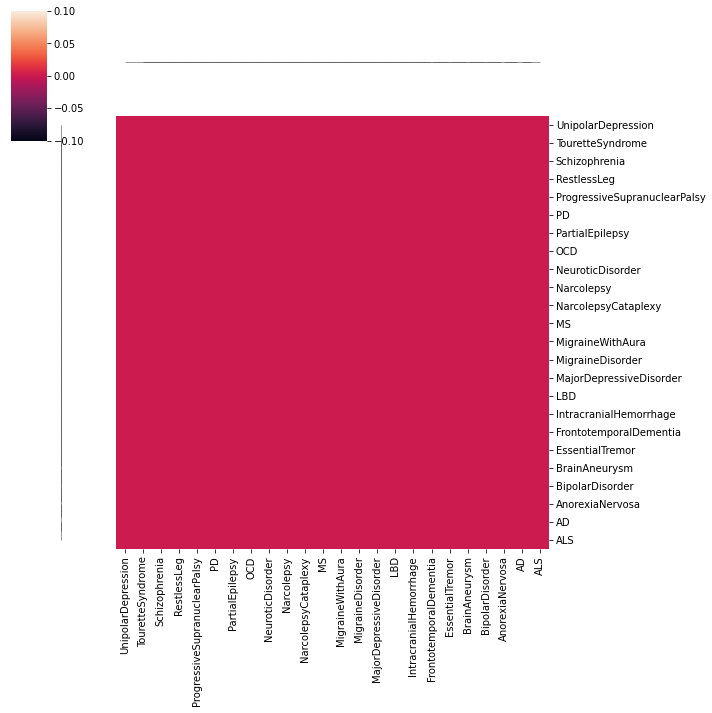

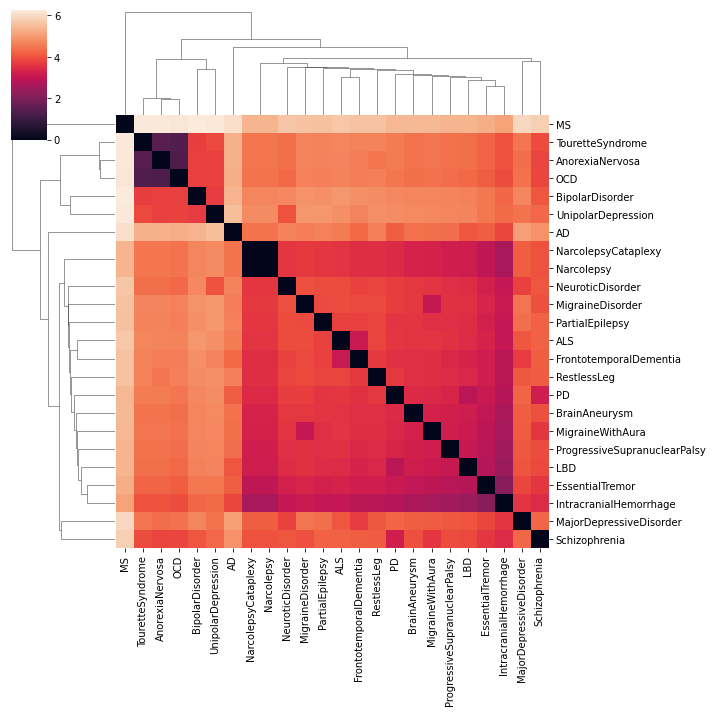

In [17]:
dis = list(itertools.combinations(list(tgts.columns), 2))
deltacon_results = pd.DataFrame(np.zeros(shape=(len(tgts.columns), len(tgts.columns))), index = list(tgts.columns), columns = list(tgts.columns))
#sns.clustermap(deltacon_results)

for n in range(0,len(dis)):
    G1, G2, distance = make_disease_network(unique_genes, dis[n][0], dis[n][1])

    print(dis[n][0])
    print(dis[n][1])

    deltacon_results.loc[dis[n][0]][dis[n][1]] = distance
    deltacon_results.loc[dis[n][1]][dis[n][0]] = distance
    deltacon_results.to_csv('processed_data/deltacon_results_crossdisease.csv')

sns.clustermap(deltacon_results)
plt.savefig(('plots/03-LR_network_visualisation/deltacon_results_crossdisease_07thr.csv'))
plt.show()

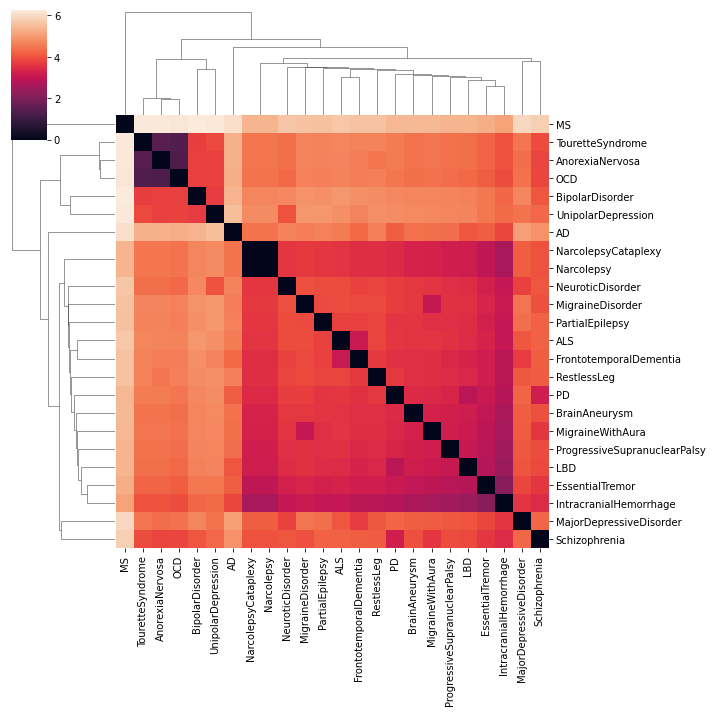

In [18]:
sns.clustermap(deltacon_results)
plt.savefig('plots/clustermap_deltacon_results_disease_networks.png', dpi = 300)

In [20]:
deltacon_results['PD'].sort_values(ascending = True)

PD                              0.000000
IntracranialHemorrhage          2.770463
LBD                             2.861584
EssentialTremor                 3.085458
Schizophrenia                   3.209589
ProgressiveSupranuclearPalsy    3.343250
MigraineWithAura                3.403393
BrainAneurysm                   3.429069
NarcolepsyCataplexy             3.429808
Narcolepsy                      3.429808
FrontotemporalDementia          3.557302
PartialEpilepsy                 3.610046
ALS                             3.636026
RestlessLeg                     3.644279
NeuroticDisorder                3.718641
MigraineDisorder                3.733175
AD                              4.146708
MajorDepressiveDisorder         4.216594
OCD                             4.467120
AnorexiaNervosa                 4.527453
TouretteSyndrome                4.530472
BipolarDisorder                 4.696227
UnipolarDepression              4.775829
MS                              5.404264
Name: PD, dtype:

PTK2B    17.0
APP      11.0
IL6R      8.0
EPHA1     6.0
MPO       6.0
         ... 
GRIN1     0.0
FGF6      0.0
FSTL5     0.0
FYN       0.0
GAL       0.0
Length: 175, dtype: float64
ITGA9     30.0
ERBB4     14.0
TBK1       2.0
CHRNA3     2.0
PON1       1.0
          ... 
FES        0.0
FGF20      0.0
FGF6       0.0
FSTL5      0.0
FYN        0.0
Length: 175, dtype: float64
AD
ALS
PTK2B    17.0
APP      11.0
IL6R      8.0
EPHA1     6.0
MPO       6.0
         ... 
GRIN1     0.0
FGF6      0.0
FSTL5     0.0
FYN       0.0
GAL       0.0
Length: 175, dtype: float64
DCC       8.0
GRIN2A    4.0
ESR2      2.0
NEGR1     2.0
VRK2      1.0
         ... 
GFRA2     0.0
FGF20     0.0
FGF6      0.0
FSTL5     0.0
FYN       0.0
Length: 175, dtype: float64
AD
AnorexiaNervosa
PTK2B    17.0
APP      11.0
IL6R      8.0
EPHA1     6.0
MPO       6.0
         ... 
GRIN1     0.0
FGF6      0.0
FSTL5     0.0
FYN       0.0
GAL       0.0
Length: 175, dtype: float64
PRKD1    10.0
DCC       8.0
CD47      8.0
ADCY1     8

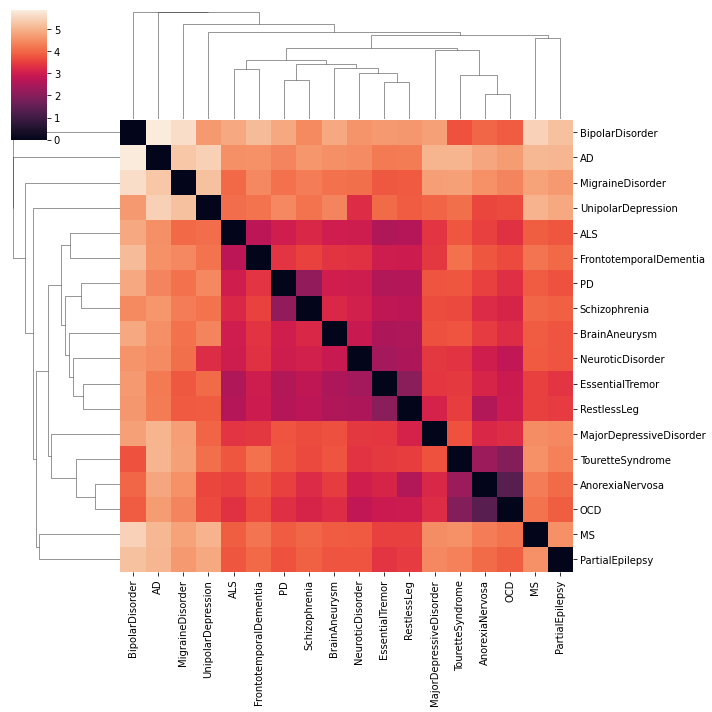

In [9]:
tgts_all = pd.read_csv('processed_data/hot-encoded-diseases_0.400000.csv')
tgts_all['gene']=tgts_all['genes']
tgts = tgts_all.drop(columns=['genes']).set_index(['gene'])

source, percSrc, targets, percTgt, sum = ml.lr.find_hits(tgts, db)

LRs = db[['genesymbol_intercell_source','genesymbol_intercell_target']][(db['genesymbol_intercell_source'].isin(list(sum.gene))) | (db['genesymbol_intercell_target'].isin(list(sum.gene)))]

unique_genes = np.unique(list(LRs['genesymbol_intercell_source'])+list(LRs['genesymbol_intercell_target']))

tgts = tgts.drop(columns = ['Empty'])


dis = list(itertools.combinations(list(tgts.columns), 2))
deltacon_results = pd.DataFrame(np.zeros(shape=(len(tgts.columns), len(tgts.columns))), index = list(tgts.columns), columns = list(tgts.columns))


for n in range(0,len(dis)):
    G1, G2, distance = make_disease_network(unique_genes, dis[n][0], dis[n][1])

    print(dis[n][0])
    print(dis[n][1])

    deltacon_results.loc[dis[n][0]][dis[n][1]] = distance
    deltacon_results.loc[dis[n][1]][dis[n][0]] = distance
    deltacon_results.to_csv('processed_data/deltacon_results_crossdisease_04thr.csv')

sns.clustermap(deltacon_results)
plt.savefig('plots/03-LR_network_visualisation/deltacon_results_crossdisease_04thr.png', bbox_inches = 'tight', dpi = 150)
plt.show()

APP        11.0
CR1         2.0
ACE         2.0
PSEN1       1.0
UNC5C       1.0
PLA2G6      0.0
PRKD1       0.0
NEGR1       0.0
LGI1        0.0
LRFN5       0.0
MAPT        0.0
NOTCH3      0.0
SNCA        0.0
SORL1       0.0
STK39       0.0
TBK1        0.0
TLR4        0.0
TUBA4A      0.0
VRK2        0.0
SCN9A       0.0
RELN        0.0
RTN4R       0.0
SCN1A       0.0
SCN2A       0.0
CILK1       0.0
CNTN4       0.0
CNTNAP2     0.0
DCC         0.0
ESR2        0.0
CHRNB2      0.0
ADCY2       0.0
AKT3        0.0
ANG         0.0
APOE        0.0
ATM         0.0
ATP2A2      0.0
GAL         0.0
GRIA1       0.0
GRIN2A      0.0
GRM5        0.0
dtype: float64
TBK1       2.0
TUBA4A     1.0
PLA2G6     0.0
PRKD1      0.0
PSEN1      0.0
NOTCH3     0.0
NEGR1      0.0
LGI1       0.0
LRFN5      0.0
MAPT       0.0
SNCA       0.0
SORL1      0.0
STK39      0.0
TLR4       0.0
UNC5C      0.0
VRK2       0.0
RELN       0.0
RTN4R      0.0
SCN1A      0.0
SCN2A      0.0
SCN9A      0.0
ACE        0.0
CHRNB2     0.0


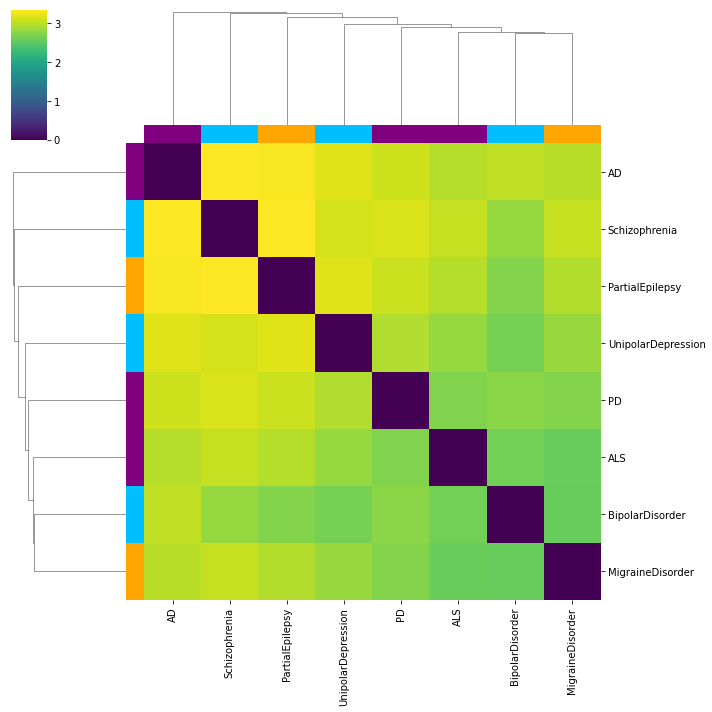

c:\Users\melis\Documents\GitHub\LR_project\mellon\lr\find_hits.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target['Empty'] = 0


PTK2B    17.0
APP      11.0
IL6R      8.0
EPHA1     6.0
MPO       6.0
         ... 
GRIN1     0.0
FGF6      0.0
FSTL5     0.0
FYN       0.0
GAL       0.0
Length: 175, dtype: float64
ITGA9     30.0
ERBB4     14.0
TBK1       2.0
CHRNA3     2.0
PON1       1.0
          ... 
FES        0.0
FGF20      0.0
FGF6       0.0
FSTL5      0.0
FYN        0.0
Length: 175, dtype: float64
AD
ALS
PTK2B    17.0
APP      11.0
IL6R      8.0
EPHA1     6.0
MPO       6.0
         ... 
GRIN1     0.0
FGF6      0.0
FSTL5     0.0
FYN       0.0
GAL       0.0
Length: 175, dtype: float64
DCC       8.0
GRIN2A    4.0
ESR2      2.0
NEGR1     2.0
VRK2      1.0
         ... 
GFRA2     0.0
FGF20     0.0
FGF6      0.0
FSTL5     0.0
FYN       0.0
Length: 175, dtype: float64
AD
AnorexiaNervosa
PTK2B    17.0
APP      11.0
IL6R      8.0
EPHA1     6.0
MPO       6.0
         ... 
GRIN1     0.0
FGF6      0.0
FSTL5     0.0
FYN       0.0
GAL       0.0
Length: 175, dtype: float64
PRKD1    10.0
DCC       8.0
CD47      8.0
ADCY1     8

c:\Users\melis\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\matrix.py:625: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  metric=self.metric)


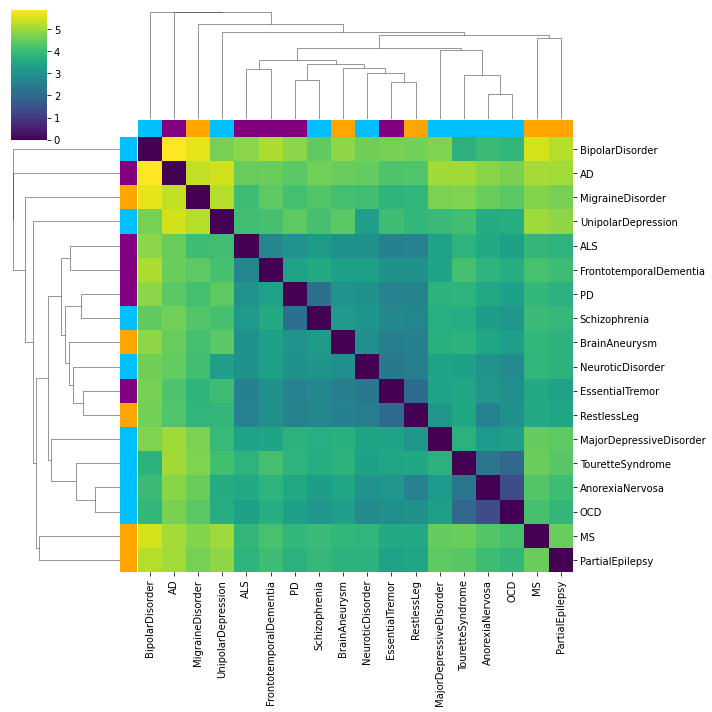

c:\Users\melis\Documents\GitHub\LR_project\mellon\lr\find_hits.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target['Empty'] = 0


NOS3      29.0
ITGA2B    27.0
ACKR2     21.0
PTK2B     17.0
APP       11.0
          ... 
FLOT1      0.0
FGFR3      0.0
FYN        0.0
GAL        0.0
ZPBP2      0.0
Length: 352, dtype: float64
ITGA9     30.0
ERBB4     14.0
CHRNA4     3.0
TBK1       2.0
CHRNA3     2.0
          ... 
FSTL5      0.0
FSHB       0.0
FLRT3      0.0
FLOT1      0.0
ZPBP2      0.0
Length: 352, dtype: float64
AD
ALS
NOS3      29.0
ITGA2B    27.0
ACKR2     21.0
PTK2B     17.0
APP       11.0
          ... 
FLOT1      0.0
FGFR3      0.0
FYN        0.0
GAL        0.0
ZPBP2      0.0
Length: 352, dtype: float64
GPR20    26.0
CDH5      9.0
DCC       8.0
GRIA1     7.0
MPL       6.0
         ... 
FSHB      0.0
GAL       0.0
FYN       0.0
FSTL5     0.0
ZPBP2     0.0
Length: 352, dtype: float64
AD
AnorexiaNervosa
NOS3      29.0
ITGA2B    27.0
ACKR2     21.0
PTK2B     17.0
APP       11.0
          ... 
FLOT1      0.0
FGFR3      0.0
FYN        0.0
GAL        0.0
ZPBP2      0.0
Length: 352, dtype: float64
ERBB2     39.0
FGFR1

c:\Users\melis\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\matrix.py:625: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  metric=self.metric)


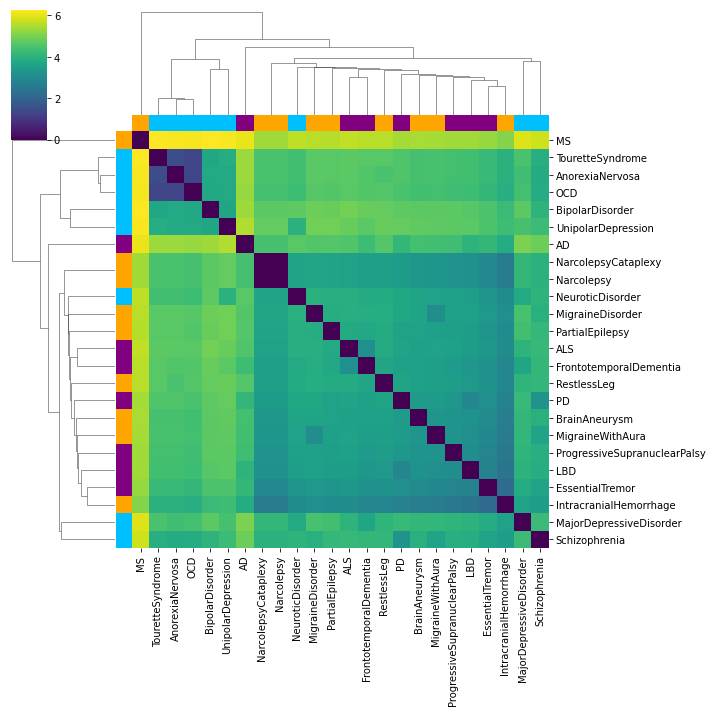

In [10]:
lut = {'AD' : 'purple',
 'ALS' : 'purple',
 'AnorexiaNervosa' : 'deepskyblue',
 'BipolarDisorder' : 'deepskyblue',
 'BrainAneurysm' : 'orange',
 'EssentialTremor' : 'purple',
 'FrontotemporalDementia' : 'purple',
 'IntracranialHemorrhage' : 'orange',
 'LBD' : 'purple',
 'MajorDepressiveDisorder' : 'deepskyblue',
 'MigraineDisorder' : 'orange',
 'MigraineWithAura' : 'orange',
 'MS' : 'orange',
 'NarcolepsyCataplexy' : 'orange',
 'Narcolepsy' : 'orange',
 'NeuroticDisorder' : 'deepskyblue',
 'OCD' : 'deepskyblue',
 'PartialEpilepsy' : 'orange',
 'PD' : 'purple',
 'ProgressiveSupranuclearPalsy' : 'purple',
 'RestlessLeg' : 'orange',
 'Schizophrenia' : 'deepskyblue',
 'TouretteSyndrome' : 'deepskyblue',
 'UnipolarDepression' : 'deepskyblue'}




all_res = ['0.700000', '0.400000', '0.100000']
for res in range(0,len(all_res)):
    tgts_all = pd.read_csv('processed_data/hot-encoded-diseases_'+all_res[res]+'.csv')
    tgts_all['gene']=tgts_all['genes']
    tgts = tgts_all.drop(columns=['genes']).set_index(['gene'])

    source, percSrc, targets, percTgt, sum = ml.lr.find_hits(tgts, db)

    LRs = db[['genesymbol_intercell_source','genesymbol_intercell_target']][(db['genesymbol_intercell_source'].isin(list(sum.gene))) | (db['genesymbol_intercell_target'].isin(list(sum.gene)))]

    unique_genes = np.unique(list(LRs['genesymbol_intercell_source'])+list(LRs['genesymbol_intercell_target']))

    tgts = tgts.drop(columns = ['Empty'])

    dis = list(itertools.combinations(list(tgts.columns), 2))
    deltacon_results = pd.DataFrame(np.zeros(shape=(len(tgts.columns), len(tgts.columns))), index = list(tgts.columns), columns = list(tgts.columns))
    #sns.clustermap(deltacon_results)

    for n in range(0,len(dis)):
        G1, G2, distance = make_disease_network(unique_genes, tgts, dis[n][0], dis[n][1])

        print(dis[n][0])
        print(dis[n][1])

        deltacon_results.loc[dis[n][0]][dis[n][1]] = distance
        deltacon_results.loc[dis[n][1]][dis[n][0]] = distance
        deltacon_results.to_csv('processed_data/03-LR_network_visualisation/deltacon_results_crossdisease'+all_res[res]+'.csv')
    row_colors = deltacon_results.columns.unique().map(lut)
    sns.clustermap(deltacon_results, row_colors = row_colors, col_colors = row_colors, cmap = 'viridis')
    plt.savefig(('plots/03-LR_network_visualisation/deltacon_results_crossdisease_'+all_res[res]+'thr.png'), dpi = 300, bbox_inches = 'tight')
    plt.savefig(('plots/03-LR_network_visualisation/deltacon_results_crossdisease_'+all_res[res]+'thr.pdf'), bbox_inches = 'tight')
    plt.show()